['N', 'EW', 'NOdet', 'EW', 'NOdet', 'EW', 'S', 'NS']
['S4', 'S11', 'S18', 'S25', 'S32', 'S39', 'S46', 'S45']


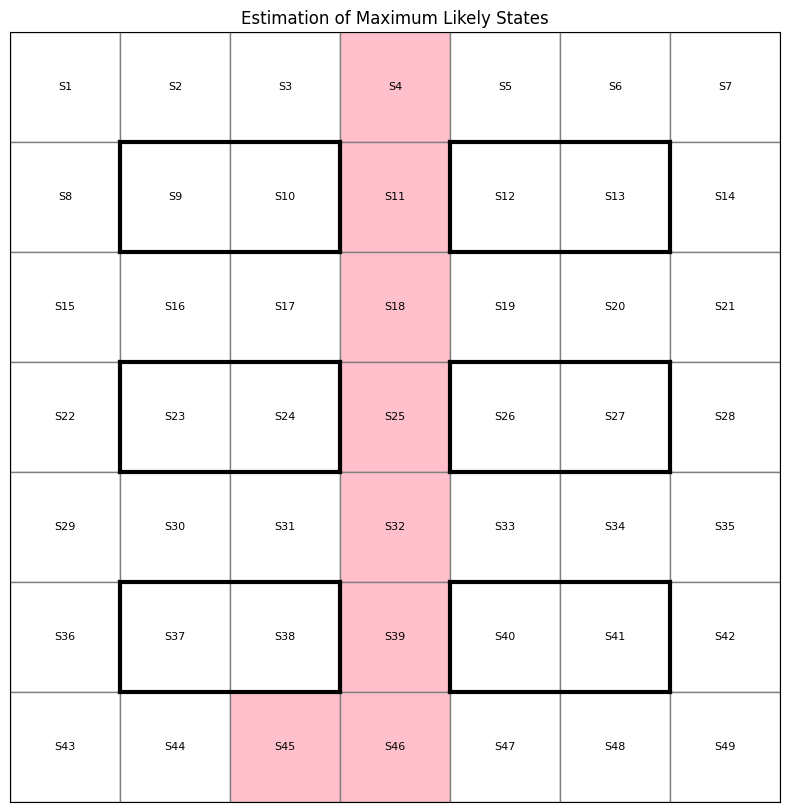

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#transition probabilities

# Define the tw models

csv_file_path = 'Matrix.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, sep=';', header=None)

# Convert the DataFrame to a NumPy array
transition = df.to_numpy()

#transition probabilities

# Define the tw models

csv_file_path = 'emission.csv'

# Read the CSV file into a pandas DataFrame
de = pd.read_csv(csv_file_path, sep=';', header=None)

# Convert the DataFrame to a NumPy array
emission = de.to_numpy()


#defining states and sequence symbols
states = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15','S16','S17','S18','S19','S20','S21','S22','S23','S24','S25','S26','S27','S28','S29','S30','S31','S32','S33','S34','S35','S36','S37','S38','S39','S40','S41','S42','S43','S44','S45','S46','S47','S48','S49']
states_dic = {'S1':0, 'S2':1 ,'S3':2 ,'S4':3 ,'S5': 4,'S6': 5,'S7':6 ,'S8':7 ,'S9': 8,'S10': 9,'S11': 10,'S12': 11 ,'S13': 12,'S14': 13,'S15': 14,'S16': 15,'S17': 16,'S18': 17,'S19': 18,'S20': 19,'S21': 20,'S22': 21,'S23': 22,'S24': 23,'S25': 24,'S26': 25,'S27': 26,'S28': 27,'S29': 28,'S30': 29,'S31': 30,'S32': 31,'S33': 32,'S34': 33,'S35': 34,'S36': 35,'S37': 36,'S38': 37,'S39': 38,'S40': 39,'S41': 40,'S42': 41,'S43': 42,'S44': 43,'S45': 44,'S46':45,'S47': 46,'S48': 47,'S49': 48}
sequence_syms = {'N':0,'NS':1,'NW':2,'NE':3,'E':4,'ES':5,'EW':6,'W':7,'WS':8,'S':9,'NOdet':10}

#test sequence
test_sequence = ['N','EW','NOdet','EW','NOdet','EW','S','NS']
print(test_sequence)

#node values stored during viterbi forward algorithm
node_values = np.zeros((len(states),len(test_sequence)))

#probabilities of going to end state
end_probs = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
#probabilities of going from start state
start_probs = [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

#storing max symbol for each stage
max_syms = [['' for _ in range(len(test_sequence))] for _ in range(len(states))]


for i, sequence_val in enumerate(test_sequence):
    for j in range(len(states)):
        # If the first sequence value, then do this
        if i == 0:
            node_values[j, i] = start_probs[j] * emission[j, sequence_syms[sequence_val]]
        # Else perform this
        else:
            values = [node_values[k, i - 1] * emission[j, sequence_syms[sequence_val]] * transition[k, j] for k in
                      range(len(states))]

            max_idx = np.argmax(values)
            max_val = max(values)
            max_syms[j][i] = states[max_idx]
            node_values[j, i] = max_val

# End state value
end_state = np.multiply(node_values[:, -1], end_probs)
end_state_val = max(end_state)
end_state_max_idx = np.argmax(end_state)
end_state_sym = states[end_state_max_idx]

# Obtaining the maximum likely states
max_likely_states = [end_state_sym]

prev_max = end_state_sym
for count in range(1, len(test_sequence)):
    current_state = max_syms[states_dic[prev_max]][-count]
    max_likely_states.append(current_state)
    prev_max = current_state

max_likely_states = max_likely_states[::-1]
print(max_likely_states)
#[print(x) for x in max_likely_states]
c=1


# Create a 7x7 matrix to represent the map
map_matrix = np.zeros((7, 7))

# Map the state indices to the corresponding positions on the 7x7 matrix
state_positions = {
    'S1': (0, 0), 'S2': (0, 1), 'S3': (0, 2), 'S4': (0, 3), 'S5': (0, 4), 'S6': (0, 5), 'S7': (0, 6),
    'S8': (1, 0), 'S9': (1, 1), 'S10': (1, 2), 'S11': (1, 3), 'S12': (1, 4), 'S13': (1, 5), 'S14': (1, 6),
    'S15': (2, 0), 'S16': (2, 1), 'S17': (2, 2), 'S18': (2, 3), 'S19': (2, 4), 'S20': (2, 5), 'S21': (2, 6),
    'S22': (3, 0), 'S23': (3, 1), 'S24': (3, 2), 'S25': (3, 3), 'S26': (3, 4), 'S27': (3, 5), 'S28': (3, 6),
    'S29': (4, 0), 'S30': (4, 1), 'S31': (4, 2), 'S32': (4, 3), 'S33': (4, 4), 'S34': (4, 5), 'S35': (4, 6),
    'S36': (5, 0), 'S37': (5, 1), 'S38': (5, 2), 'S39': (5, 3), 'S40': (5, 4), 'S41': (5, 5), 'S42': (5, 6),
    'S43': (6, 0), 'S44': (6, 1), 'S45': (6, 2), 'S46': (6, 3), 'S47': (6, 4), 'S48': (6, 5), 'S49': (6, 6),
}

# Assign the same color to all squares corresponding to states in max_likely_states
for state in max_likely_states:
    row, col = state_positions[state]
    map_matrix[row, col] = 1

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Set the aspect ratio to 'equal' to make the squares actual squares
ax.set_aspect('equal')

# Loop through each square and draw it with the corresponding label
for i in range(7):
    for j in range(7):
        # Calculate coordinates based on the desired order (top left to bottom)
        x = j  # x-coordinate (0 to 6)
        y = 6 - i  # y-coordinate (6 to 0)

        # Get the state name based on the current position
        state_name = f'S{(i * 7) + j + 1}'

        # Draw a square at the center of the current position
        if state_name in max_likely_states:
            square = plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='gray', facecolor='pink')  # Change the color
        else:
            square = plt.Rectangle((x, y), 1, 1, fill=True, edgecolor='gray', facecolor='white')
        ax.add_patch(square)

        # Add the label in the center of the square
        ax.text(x + 0.5, y + 0.5, state_name, ha='center', va='center', fontsize=8)

# Set axis limits and remove ticks
ax.set_xlim(0, 7)
ax.set_ylim(0, 7)
ax.set_xticks([])
ax.set_yticks([])

# Access the specified square and change its fill color to red
#index=np.argmax(max_likely_states)
#specific_square = ax.patches[index]
#specific_square.set_facecolor('red')

# Make the line between obstacle thicker
line_between_s8_s9 = plt.Line2D([1, 1], [1, 2], color='black', linewidth=3)
ax.add_line(line_between_s8_s9)
        
line_between_s10_s11 = plt.Line2D([3, 3], [1, 2], color='black', linewidth=3)
ax.add_line(line_between_s10_s11)
        
line_between_s11_s12 = plt.Line2D([4, 4], [1, 2], color='black', linewidth=3)
ax.add_line(line_between_s11_s12)
        
line_between_s13_s14 = plt.Line2D([6, 6], [1, 2], color='black', linewidth=3)
ax.add_line(line_between_s13_s14)

line_between_s22_s23 = plt.Line2D([1, 1], [3, 4], color='black', linewidth=3)
ax.add_line(line_between_s22_s23)
        
line_between_s24_s25 = plt.Line2D([3, 3], [3, 4], color='black', linewidth=3)
ax.add_line(line_between_s24_s25)
        
line_between_s25_s26 = plt.Line2D([4, 4], [3, 4], color='black', linewidth=3)
ax.add_line(line_between_s25_s26)
        
line_between_s27_s28 = plt.Line2D([6, 6], [3, 4], color='black', linewidth=3)
ax.add_line(line_between_s27_s28)

line_between_s36_s37 = plt.Line2D([1, 1], [5, 6], color='black', linewidth=3)
ax.add_line(line_between_s36_s37)
        
line_between_s38_s39 = plt.Line2D([3, 3], [5, 6], color='black', linewidth=3)
ax.add_line(line_between_s38_s39)
        
line_between_s39_s40 = plt.Line2D([4, 4], [5, 6], color='black', linewidth=3)
ax.add_line(line_between_s39_s40)
        
line_between_s41_s42 = plt.Line2D([6, 6], [5, 6], color='black', linewidth=3)
ax.add_line(line_between_s41_s42)

line_between_h1 = plt.Line2D([1, 3], [1, 1], color='black', linewidth=3)
ax.add_line(line_between_h1)
line_between_h2 = plt.Line2D([4, 6], [1, 1], color='black', linewidth=3)
ax.add_line(line_between_h2)
line_between_h3 = plt.Line2D([1, 3], [2, 2], color='black', linewidth=3)
ax.add_line(line_between_h3)
line_between_h4 = plt.Line2D([4, 6], [2, 2], color='black', linewidth=3)
ax.add_line(line_between_h4)
line_between_h5 = plt.Line2D([1, 3], [3, 3], color='black', linewidth=3)
ax.add_line(line_between_h5)
line_between_h6 = plt.Line2D([4, 6], [3, 3], color='black', linewidth=3)
ax.add_line(line_between_h6)
line_between_h7 = plt.Line2D([1, 3], [4, 4], color='black', linewidth=3)
ax.add_line(line_between_h7)
line_between_h8 = plt.Line2D([4, 6], [4, 4], color='black', linewidth=3)
ax.add_line(line_between_h8)
line_between_h9 = plt.Line2D([1, 3], [5, 5], color='black', linewidth=3)
ax.add_line(line_between_h9)
line_between_h10 = plt.Line2D([4, 6], [5, 5], color='black', linewidth=3)
ax.add_line(line_between_h10)
line_between_h11 = plt.Line2D([1, 3], [6, 6], color='black', linewidth=3)
ax.add_line(line_between_h11)
line_between_h12 = plt.Line2D([4, 6], [6, 6], color='black', linewidth=3)
ax.add_line(line_between_h12)
#save map
plt.savefig('map.png')
# Plot the map
plt.title('Estimation of Maximum Likely States')
plt.show()

